In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob

In [5]:
path = "/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results"
files = glob.glob(path + "/step-*/result.json")

In [18]:
merges = []
splits = []
checkpoints = []
for f in sorted(files, key=lambda x: int(x.split("/")[-2].split("-")[1])):
  checkpoints.append(f.split("/")[-2].split("-")[1])
  results = json.load(open(f))
  merges.append(results["best_edits"]["total_merges_needed_to_fix_splits"])
  splits.append(results["best_edits"]["total_splits_needed_to_fix_merges"])
  print(f)


/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-0/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-25000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-50000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-75000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-100000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-125000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-150000/result.json
/home/anton/github/autoseg/src/autoseg/artifacts/Baseline_UNet/results/step-175000/result.json


In [14]:
merges

[24, 1357, 925, 738, 821, 890, 832, 770]

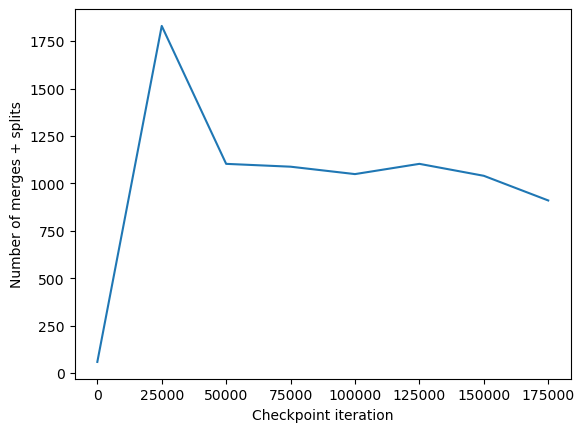

In [21]:
plt.ylabel("Number of merges + splits")
plt.xlabel("Checkpoint iteration")
plt.plot(checkpoints, np.array(splits) + np.array(merges))

In [22]:
def plot_metric(metric):
  vals = []
  checkpoints = []
  for f in sorted(files, key=lambda x: int(x.split("/")[-2].split("-")[1])):
    checkpoints.append(f.split("/")[-2].split("-")[1])
    results = json.load(open(f))
    vals.append(results["best_nvi"][metric])
  plt.ylabel(metric)
  plt.xlabel("Checkpoint iteration")
  plt.plot(checkpoints, vals)
  

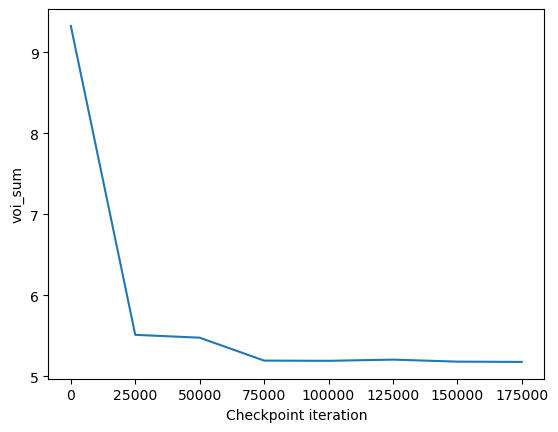

In [25]:
plot_metric("voi_sum")